## IBM Case Study

### Business problem:

1. What are the key factors leading to employee attrition?

2. What actions can be taken to reduce turnover?

#### Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [2]:
employee_data = pd.read_csv("IBMEmployee-Attrition.csv")
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Data Cleaning & Preprocessing

In [69]:
#check for missing values
employee_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

#### Exploratory Data Analysis

In [70]:
#number of rows & coloumns in dataset
employee_data.shape

(1470, 33)

In [5]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [71]:
#checking for categorical coloumns
employee_data.select_dtypes(include=['object']).dtypes

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

Checking the unique values of column having datatype: 'object'

In [67]:
def unique_values_names(employee_data):
    for column in employee_data:
        if employee_data[column].dtype=='object':
            print(f'{column}:{employee_data[column].unique()}')

In [68]:
unique_values_names(employee_data)

BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department:['Sales' 'Research & Development' 'Human Resources']
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender:['Female' 'Male']
JobRole:['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus:['Single' 'Married' 'Divorced']
Over18:['Y']
OverTime:['Yes' 'No']


In [15]:
employee_data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [16]:
# let's encode the attrition column so we can use it for EDA
employee_data['Attrition'] = employee_data['Attrition'].factorize(['No','Yes'])[0]
employee_data.head()
# Attrition: No = 0    Yes = 1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


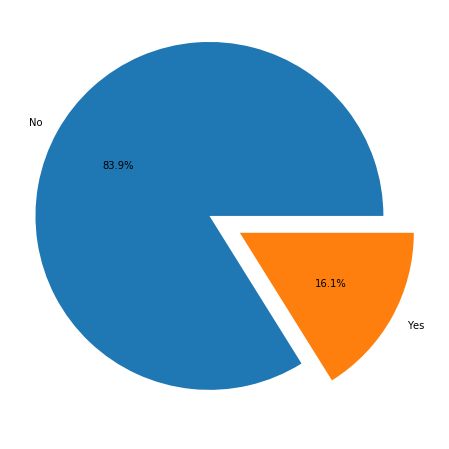

In [17]:
plt.figure(figsize=(8,8))
pie = employee_data.groupby('Attrition')['Attrition'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No', 'Yes'], autopct='%1.1f%%');

In [72]:
#checking for numeric coloumns
employee_data.select_dtypes(include=['int64']).dtypes

Age                         int64
Attrition                   int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

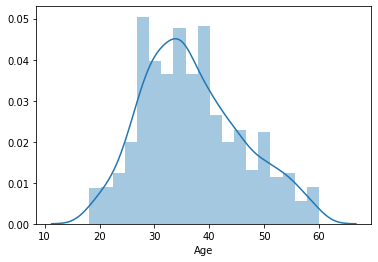

In [19]:
sns.distplot(employee_data["Age"])

In [22]:
employee_data['Age'].value_counts().sort_values(ascending=False).head(10)


35    78
34    77
31    69
36    69
29    68
32    61
30    60
38    58
33    58
40    57
Name: Age, dtype: int64

In [23]:
employee_data['Age'].value_counts().sort_values(ascending=False).tail()

59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

In [24]:
employee_data['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [25]:
employee_data['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

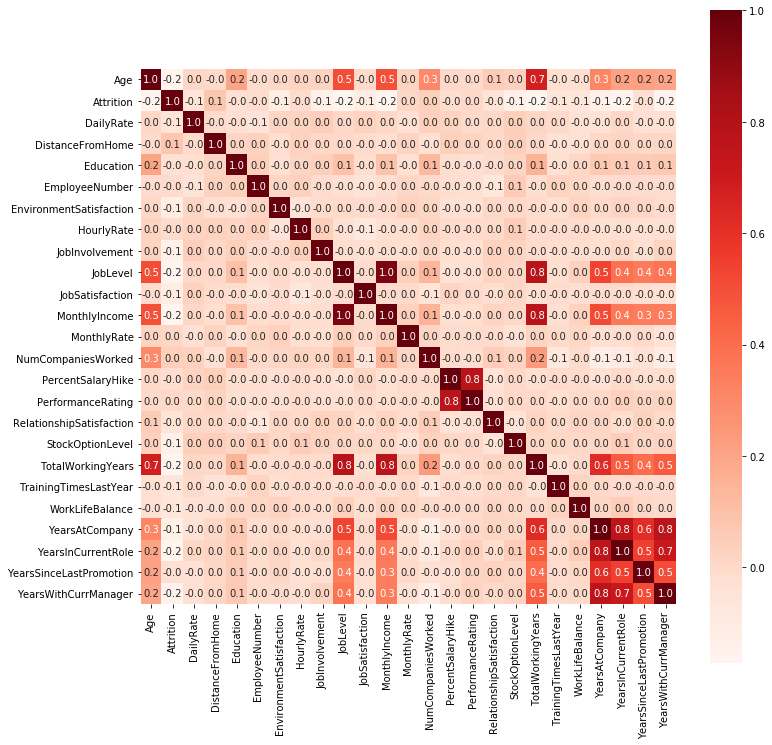

In [26]:
# We can use a heatmap to check correlation between the variables.
employee_data = employee_data.drop(['EmployeeCount','StandardHours'], axis=1) # dropping these two columns because they only have one value
corr = employee_data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

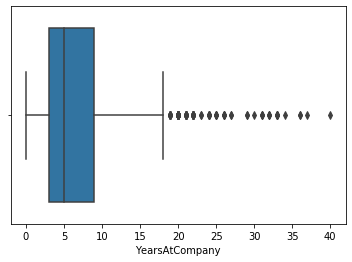

In [27]:
sns.boxplot(employee_data["YearsAtCompany"])

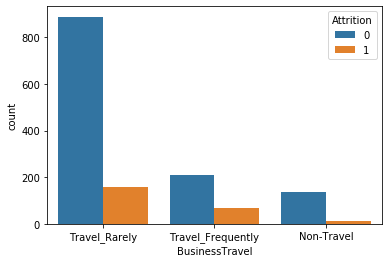

In [28]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=employee_data);

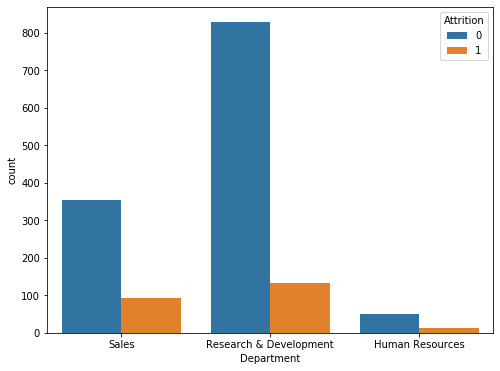

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(x='Department', hue='Attrition', data=employee_data);

In [30]:
employee_data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

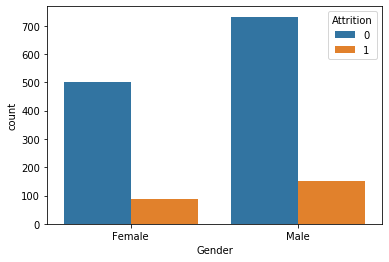

In [31]:
sns.countplot(x='Gender', hue='Attrition', data=employee_data);

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

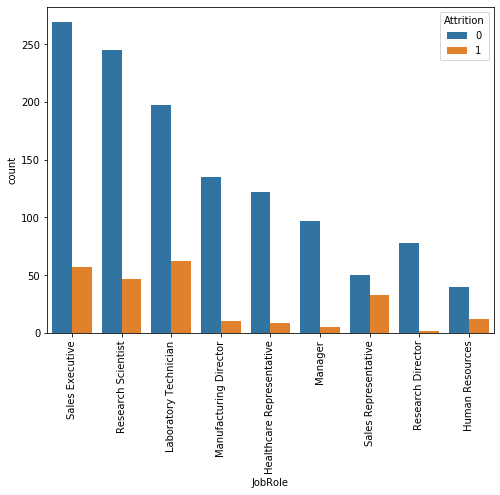

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(x='JobRole', hue='Attrition', data=employee_data);
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

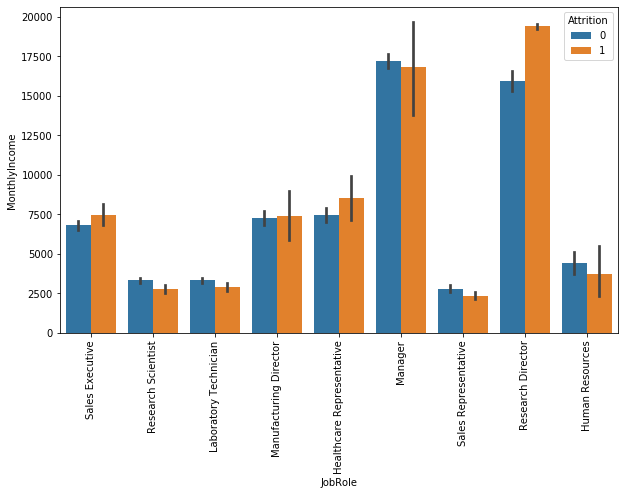

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=employee_data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

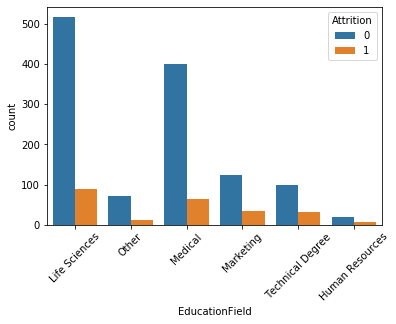

In [34]:
sns.countplot(x='EducationField', hue='Attrition', data=employee_data);
plt.xticks(rotation=45)

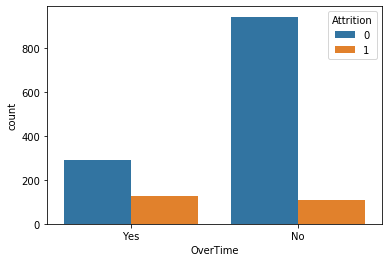

In [35]:
sns.countplot(x='OverTime', hue='Attrition', data=employee_data);

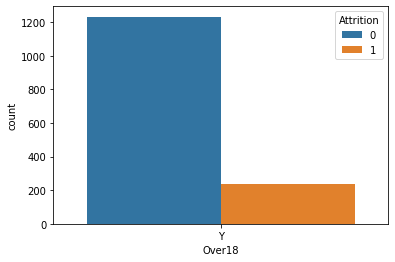

In [59]:
sns.countplot(x='Over18', hue='Attrition', data=employee_data);

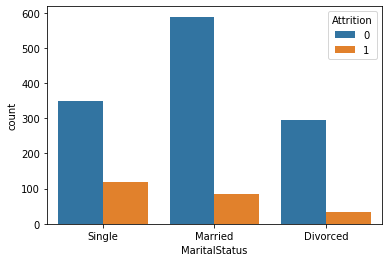

In [60]:
sns.countplot(x='MaritalStatus', hue='Attrition', data=employee_data);

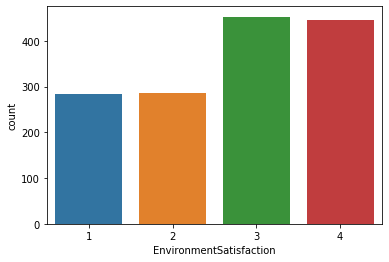

In [36]:
sns.countplot(x='EnvironmentSatisfaction', data=employee_data);

#### Splitting Data

In [37]:
# Separating the features from the target (In the process, we will drop features that we don't think are key factors.)
X = employee_data.drop(['Attrition','BusinessTravel','EducationField','OverTime'],axis=1) # Features
y = employee_data['Attrition'] # Target

In [38]:
# Label encoding the categorical variables

X['Department'] = preprocessing.LabelEncoder().fit_transform(X['Department'])
X['Education'] = preprocessing.LabelEncoder().fit_transform(X['Education'])
X['JobRole'] = preprocessing.LabelEncoder().fit_transform(X['JobRole'])
X['Gender'] = preprocessing.LabelEncoder().fit_transform(X['Gender'])
X['MaritalStatus'] = preprocessing.LabelEncoder().fit_transform(X['MaritalStatus'])
X['Over18'] = preprocessing.LabelEncoder().fit_transform(X['Over18'])

In [39]:
# Data Standardization
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [40]:
# Splitting Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [41]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1470, 29)
(1176, 29)
(294, 29)


#### Model Building

In [42]:
models = [] # ML Models
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Logistic Regression", LogisticRegression(solver='liblinear')))
models.append(("SVM", svm.SVC(kernel='linear')))

n_folds = 5
results = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=n_folds)
    print("Testing model:", name)
    
    # Cross Validation Score
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="f1_weighted", verbose=0, n_jobs=-1)
    
    # Fitting the Model
    model.fit(X_train,y_train)
    
    # Model Predictions and Finding Accuracy
    train_pred = model.predict(X_train)
    Training_score = accuracy_score(train_pred,y_train)
    test_pred = model.predict(X_test)
    Test_score = accuracy_score(test_pred,y_test)
    
    results.append(cv_results)
    
    msg = f"Cross_Val Mean: {cv_results.mean()}, Training Accuracy: {Training_score}, Testing Accuracy: {Test_score}"
    print(msg + "\n")

Testing model: Random Forest
Cross_Val Mean: 0.7997207371904513, Training Accuracy: 1.0, Testing Accuracy: 0.8435374149659864

Testing model: Logistic Regression
Cross_Val Mean: 0.8219775205615518, Training Accuracy: 0.8656462585034014, Testing Accuracy: 0.8571428571428571

Testing model: SVM
Cross_Val Mean: 0.7660141990060427, Training Accuracy: 0.8392857142857143, Testing Accuracy: 0.8367346938775511



Average cross-validation score for all three models are quite similar and relatively high.

In [74]:
# Chi-squared tests for categorical features
from scipy.stats import chi2_contingency

cat_features = ['Gender', 'Department', 'JobRole']
for feature in cat_features:
    contingency_table = pd.crosstab(index=employee_data[feature], columns=employee_data['Attrition'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'Chi-squared test for {feature} and Attrition: p-value = {p:.4f}')

Chi-squared test for Gender and Attrition: p-value = 0.2906
Chi-squared test for Department and Attrition: p-value = 0.0045
Chi-squared test for JobRole and Attrition: p-value = 0.0000


Insights :

1. A lot of employees remain in their current role and also under the same manager as years pass by meaning they don't get promotion and this could be a major factor contributing to attrition.
2. Most employees who travel rarely don't leave the company.Thus, sending employees on business travels or not doesn't really make much of a difference and doesn't have a significant effect on attrition.
3. Gender,Overtime hours, degrees of employees are not significant factors behind attritions.
4. We can see Laboratory technicians, research scientists and sales representatives and executives have very low salary and this could be a major factor behind attritions.
5. If we considered percentage of attritions per department, we would see that the HR department has most attritions and they have very low salary.
6. We can see that a random forest model gives 100% accuracy while the other two are ~85% accurate for the training data. However, for the testing data, all the models give ~ 85% accuracy while the logistic Regression model predicts most accurately
7. With the results of Chi-squared test, the department someone works in and Job role could have a significant impact on whether they leave the company.


Recommendations :

1. Set up a task force to conduct a salary review and make recommendations for adjustments, focusing on roles identified as high-risk for attrition.
2. Conduct a comprehensive salary review for roles such as laboratory technicians, research scientists, and sales representatives to ensure their compensation aligns with industry standards and reflects their contributions.
3. Use predictive models, particularly the logistic regression model which has shown accuracy in testing data, to identify employees at high risk of leaving. Implement proactive retention strategies for these individuals.
